In [18]:
import numpy as np 
import pandas as pd 

from plotly.offline import init_notebook_mode,iplot
init_notebook_mode(connected=True)

In [19]:
data=pd.read_excel("Global_Dataset.xlsx",engine='openpyxl' )

In [20]:
year_list=[]
for i in range(0,len(data["CVE-ID"])):
    a=data["CVE-ID"][i].split("-")[1]
    year_list.append(a)

data.insert(loc=2, column='Year', value=year_list)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169566 entries, 0 to 169565
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   ID           169566 non-null  int64 
 1   CVE-ID       169566 non-null  object
 2   Year         169566 non-null  object
 3   CVSS-V3      169566 non-null  object
 4   CVSS-V2      169566 non-null  object
 5   SEVERITY     169566 non-null  object
 6   DESCRIPTION  169566 non-null  object
 7   CWE-ID       169566 non-null  object
dtypes: int64(1), object(7)
memory usage: 10.3+ MB


In [21]:
import plotly.graph_objects as go
dataN=data.head(10)

fig = go.Figure(data=[go.Table(
    header=dict(values=dataN.columns,
                line_color='darkslategray',
                fill_color='indianred',
                align='left'),
    cells=dict(values=[dataN.ID, dataN["CVE-ID"], dataN.Year, dataN["CVSS-V3"],dataN["CVSS-V2"],dataN.SEVERITY,dataN.DESCRIPTION,dataN["CWE-ID"]], # 2nd column
               line_color='darkslategray',
               fill_color='mistyrose',
               align='left'))
])

fig.update_layout(width=1000, height=1000)
fig.show()

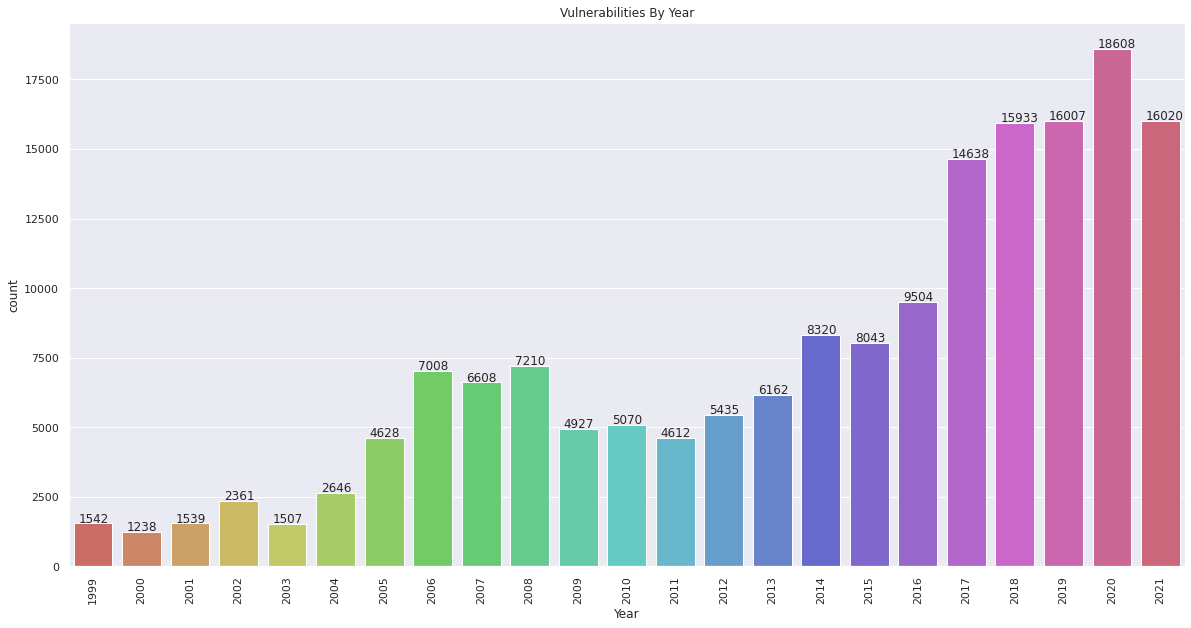

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (20,10)
sns.set_theme(style="darkgrid")

ax = sns.countplot(x="Year", data=data,palette="hls")
ax.set_title("Vulnerabilities By Year")
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))
plt.xticks(rotation=90)
plt.show()

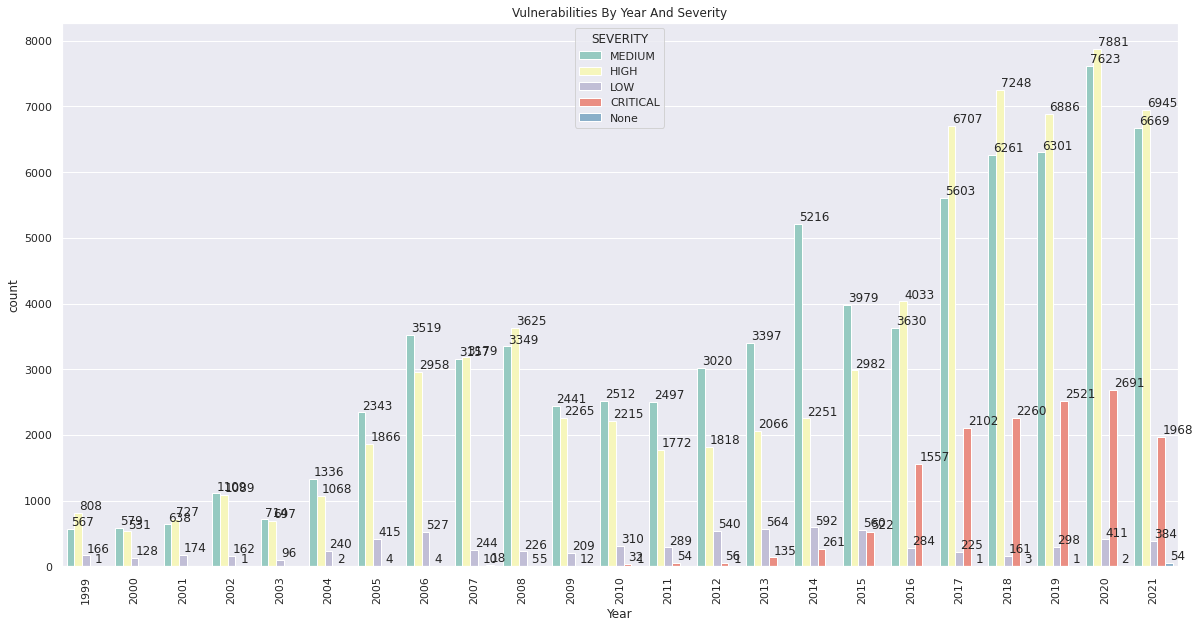

In [23]:

plt.rcParams["figure.figsize"] = (20,10)
sns.set_theme(style="darkgrid")

ax = sns.countplot(x="Year", data=data,palette="Set3",hue="SEVERITY")
ax.set_title("Vulnerabilities By Year And Severity")
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))
plt.xticks(rotation=90)
plt.show()

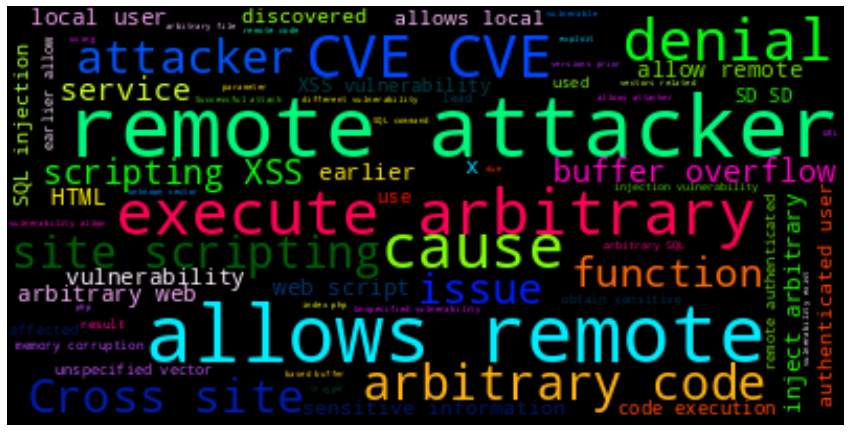

In [24]:
from PIL import Image
from wordcloud import WordCloud,STOPWORDS
text = " ".join(desc for desc in data.DESCRIPTION)
stopwords = set(STOPWORDS)
stopwords.update(["will","announcing","via","none"])
word_cloud = WordCloud(background_color = 'black',colormap="gist_ncar",contour_width=1, stopwords=stopwords,contour_color="black").generate(text)
plt.rcParams["figure.figsize"] = (15,15)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [25]:
dataHD=pd.read_excel("./Hardware Design/HD_Vulnerability_Dataset.xlsx",engine='openpyxl')

In [26]:
year_list=[]
for i in range(0,len(dataHD["CVE-ID"])):
    a=dataHD["CVE-ID"][i].split("-")[1]
    year_list.append(a)

dataHD.insert(loc=2, column='Year', value=year_list)

In [27]:
df2011=dataHD[dataHD.Year=="2011"]["CWE-NAME"].value_counts().to_frame().reset_index()
df2012=dataHD[dataHD.Year=="2012"]["CWE-NAME"].value_counts().to_frame().reset_index()
df2013=dataHD[dataHD.Year=="2013"]["CWE-NAME"].value_counts().to_frame().reset_index()
df2014=dataHD[dataHD.Year=="2014"]["CWE-NAME"].value_counts().to_frame().reset_index()
df2015=dataHD[dataHD.Year=="2015"]["CWE-NAME"].value_counts().to_frame().reset_index()
df2016=dataHD[dataHD.Year=="2016"]["CWE-NAME"].value_counts().to_frame().reset_index()
df2017=dataHD[dataHD.Year=="2017"]["CWE-NAME"].value_counts().to_frame().reset_index()
df2018=dataHD[dataHD.Year=="2018"]["CWE-NAME"].value_counts().to_frame().reset_index()
df2019=dataHD[dataHD.Year=="2019"]["CWE-NAME"].value_counts().to_frame().reset_index()
df2020=dataHD[dataHD.Year=="2020"]["CWE-NAME"].value_counts().to_frame().reset_index()
df2021=dataHD[dataHD.Year=="2021"]["CWE-NAME"].value_counts().to_frame().reset_index()
df2022=dataHD[dataHD.Year=="2022"]["CWE-NAME"].value_counts().to_frame().reset_index()

In [28]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import plotly.express as px
fig = make_subplots(rows=3, cols=4,  subplot_titles=("2011", "2012", "2013","2014","2015","2016","2017","2018","2019","2020","2021"),
                    specs=[[{"type": "pie"}, {"type": "pie"}, {"type": "pie"}, {"type": "pie"}],[{"type": "pie"},{"type": "pie"},{"type": "pie"},{"type": "pie"}],[{"type": "pie"},{"type": "pie"},{"type": "pie"},{"type": "pie"}]])

fig.add_trace(go.Pie(labels=df2011["index"].values, values=df2011["CWE-NAME"].values,name=2011 ) ,row=1, col=1)
fig.add_trace(go.Pie(labels=df2012["index"].values, values=df2012["CWE-NAME"].values,name=2012) ,row=1, col=2)
fig.add_trace(go.Pie(labels=df2013["index"].values, values=df2013["CWE-NAME"].values,name=2013) ,row=1, col=3)
fig.add_trace(go.Pie(labels=df2014["index"].values, values=df2014["CWE-NAME"].values,name=2014) ,row=1, col=4)
fig.add_trace(go.Pie(labels=df2015["index"].values, values=df2015["CWE-NAME"].values,name=2015) ,row=2, col=1)
fig.add_trace(go.Pie(labels=df2016["index"].values, values=df2016["CWE-NAME"].values,name=2016) ,row=2, col=2)
fig.add_trace(go.Pie(labels=df2017["index"].values, values=df2017["CWE-NAME"].values,name=2017) ,row=2, col=3)
fig.add_trace(go.Pie(labels=df2018["index"].values, values=df2018["CWE-NAME"].values,name=2018) ,row=2, col=4)
fig.add_trace(go.Pie(labels=df2019["index"].values, values=df2019["CWE-NAME"].values,name=2019) ,row=3, col=1)
fig.add_trace(go.Pie(labels=df2020["index"].values, values=df2020["CWE-NAME"].values,name=2020) ,row=3, col=2)
fig.add_trace(go.Pie(labels=df2021["index"].values, values=df2021["CWE-NAME"].values,name=2021) ,row=3, col=3)
fig.add_trace(go.Pie(labels=df2022["index"].values, values=df2022["CWE-NAME"].values,name=2022) ,row=3, col=4)

fig.update_traces(hoverinfo='label+percent', textfont_size=15,textposition='inside',
                  marker=dict(line=dict(color='red', width=2)))


fig.update_layout(height=900, width=1700, colorway=px.colors.sequential.Electric , 
                  title_text="Percentage of Hardware Design Vulnerabilities between 2011-2021")

fig.show()

In [29]:
import plotly.express as px

fig = px.histogram(dataHD, x="CVSS-V2", histfunc='avg',y="Year",color="CWE-NAME",orientation='h', height=700,width=1500,text_auto='.2s',title="Hardware Design- Average CVSS-V2 Score by CWE NAME and Year")
fig.update_traces( marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5, opacity=0.6)
fig.show()

In [30]:
dataSD=pd.read_excel("./Software Development/SD_Vulnerability_Dataset.xlsx",engine='openpyxl')

In [31]:
year_list=[]
for i in range(0,len(dataSD["CVE-ID"])):
    a=dataSD["CVE-ID"][i].split("-")[1]
    year_list.append(a)

dataSD.insert(loc=2, column='Year', value=year_list)

In [32]:
dfs2014=dataSD[dataSD.Year=="2014"]["CWE-NAME"].value_counts().to_frame().reset_index()[0:20]
dfs2015=dataSD[dataSD.Year=="2015"]["CWE-NAME"].value_counts().to_frame().reset_index()[0:20]
dfs2016=dataSD[dataSD.Year=="2016"]["CWE-NAME"].value_counts().to_frame().reset_index()[0:20]
dfs2017=dataSD[dataSD.Year=="2017"]["CWE-NAME"].value_counts().to_frame().reset_index()[0:20]
dfs2018=dataSD[dataSD.Year=="2018"]["CWE-NAME"].value_counts().to_frame().reset_index()[0:20]
dfs2019=dataSD[dataSD.Year=="2019"]["CWE-NAME"].value_counts().to_frame().reset_index()[0:20]
dfs2020=dataSD[dataSD.Year=="2020"]["CWE-NAME"].value_counts().to_frame().reset_index()[0:20]
dfs2021=dataSD[dataSD.Year=="2021"]["CWE-NAME"].value_counts().to_frame().reset_index()[0:20]


In [33]:

import plotly.express as px
fig = make_subplots(rows=2, cols=4,  subplot_titles=("2014", "2015", "2016","2017","2018","2019","2020","2021"),
                    specs=[[{"type": "pie"}, {"type": "pie"}, {"type": "pie"}, {"type": "pie"}],[{"type": "pie"},{"type": "pie"},{"type": "pie"},{"type": "pie"}]])

fig.add_trace(go.Pie(labels=dfs2014["index"].values, values=dfs2014["CWE-NAME"].values,name=2014) ,row=1, col=1)
fig.add_trace(go.Pie(labels=dfs2015["index"].values, values=dfs2015["CWE-NAME"].values,name=2015) ,row=1, col=2)
fig.add_trace(go.Pie(labels=dfs2016["index"].values, values=dfs2016["CWE-NAME"].values,name=2016) ,row=1, col=3)
fig.add_trace(go.Pie(labels=dfs2017["index"].values, values=dfs2017["CWE-NAME"].values,name=2017) ,row=1, col=4)
fig.add_trace(go.Pie(labels=dfs2018["index"].values, values=dfs2018["CWE-NAME"].values,name=2018) ,row=2, col=1)
fig.add_trace(go.Pie(labels=dfs2019["index"].values, values=dfs2019["CWE-NAME"].values,name=2019) ,row=2, col=2)
fig.add_trace(go.Pie(labels=dfs2020["index"].values, values=dfs2020["CWE-NAME"].values,name=2020) ,row=2, col=3)
fig.add_trace(go.Pie(labels=dfs2021["index"].values, values=dfs2021["CWE-NAME"].values,name=2021) ,row=2, col=4)

fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=15,textposition='inside',
                  marker=dict(line=dict(color='#000000', width=2)))
fig.update_layout(height=800, width=1700,colorway=px.colors.qualitative.D3_r,
                  title_text="Number of Top 20 Software Development Vulnerabilities between 2014-2021")

fig.show()